已连接到 wsq (Python 3.8.19)

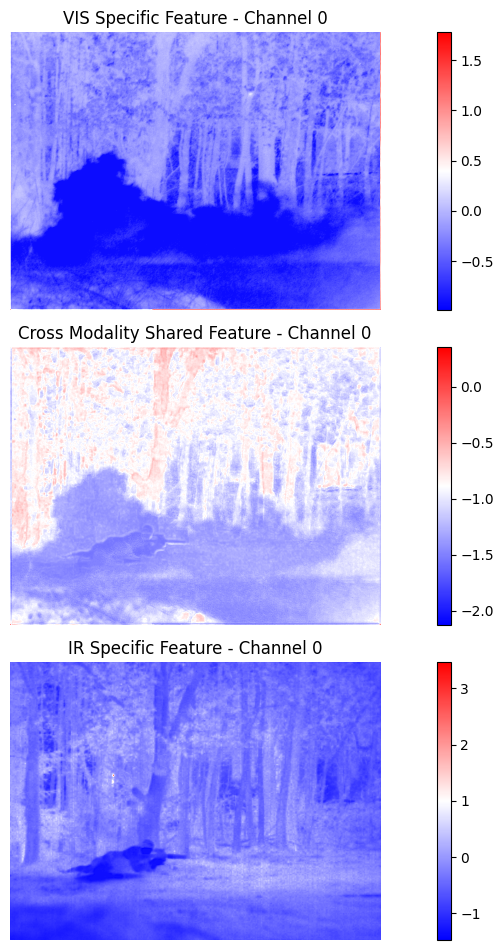

暂停30秒看看特征图


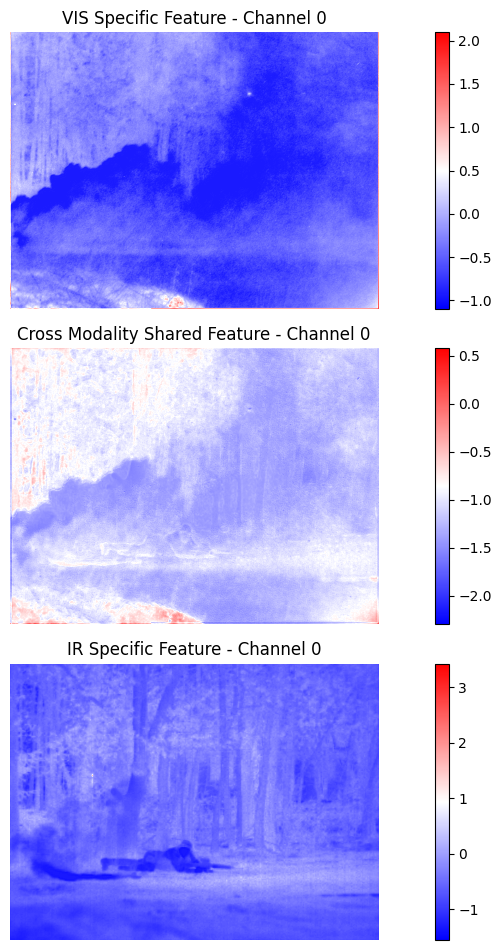

暂停30秒看看特征图


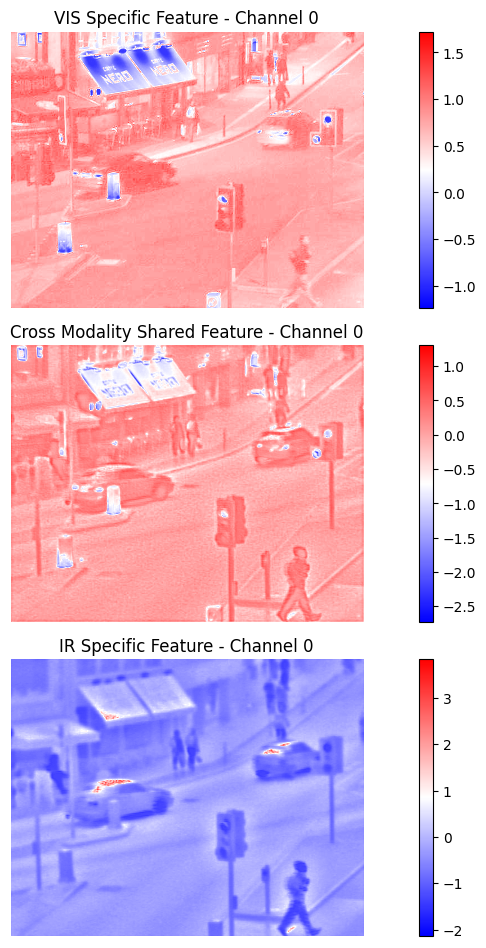

暂停30秒看看特征图


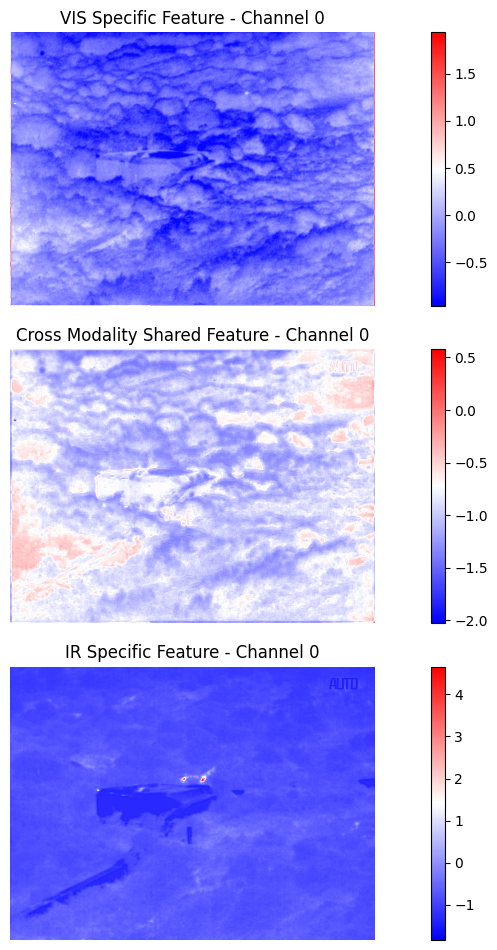

暂停30秒看看特征图


KeyboardInterrupt: 

In [ ]:
from net_best import Restormer_Encoder, Restormer_Decoder, BaseFeatureExtraction, DetailFeatureExtraction,\
                Restormer_resolve_Encoder, SpecificFeatureCross
                
import os
import time
import numpy as np
from utils.Evaluator import Evaluator
import torch
import torch.nn as nn
from utils.img_read_save import img_save,image_read_cv2
from utils.FeatureMap import plt_show_decomp_feature
import warnings
import logging
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.CRITICAL)

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
# ckpt_path=r"models/CDDFuse_IVF.pth"
ckpt_path= r"models/SepcificDecompFuse_OnePhase_01-14-11-02-grad100.pth"
for dataset_name in ["TNO","RoadScene","MSRS"]:
    # print("\n"*2+"="*80)
    # model_name="CDDFuse    "
    # print("The test result of "+dataset_name+' :')
    test_folder=os.path.join('test_img',dataset_name) 
    test_out_folder=os.path.join('test_result',dataset_name)
    feature_map_out_folfer_shared = os.path.join('test_feature_map_shd',dataset_name)
    feature_map_out_folfer_speir = os.path.join('test_feature_map_speir',dataset_name)
    feature_map_out_folfer_spevis = os.path.join('test_feature_map_spevis',dataset_name)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    Encoder = nn.DataParallel(Restormer_resolve_Encoder()).to(device)
    Decoder = nn.DataParallel(Restormer_Decoder()).to(device) 
    # SepcificFuseLayer = nn.DataParallel(SpecificFeatureCross()).to(device)
    SepcificFuseLayer = nn.DataParallel(DetailFeatureExtraction(num_layers=4)).to(device)

    Encoder.load_state_dict(torch.load(ckpt_path)['DIDF_Encoder'])
    Decoder.load_state_dict(torch.load(ckpt_path)['DIDF_Decoder'])
    SepcificFuseLayer.load_state_dict(torch.load(ckpt_path)['SepcificFuseLayer'])

    Encoder.eval()
    Decoder.eval()
    SepcificFuseLayer.eval()

    with torch.no_grad():
        for img_name in os.listdir(os.path.join(test_folder,"ir")):

            data_IR=image_read_cv2(os.path.join(test_folder,"ir",img_name),mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0
            data_VIS = image_read_cv2(os.path.join(test_folder,"vi",img_name), mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0

            data_IR,data_VIS = torch.FloatTensor(data_IR),torch.FloatTensor(data_VIS)
            data_VIS, data_IR = data_VIS.cuda(), data_IR.cuda()

            shared_feature, specific_feature_vis, specific_feature_ir = Encoder(data_VIS, data_IR)
            # specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            
            specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            data_Fuse, _ = Decoder(data_VIS, shared_feature, specific_feature_fuse)
            data_Fuse=(data_Fuse-torch.min(data_Fuse))/(torch.max(data_Fuse)-torch.min(data_Fuse))
            fi = np.squeeze((data_Fuse * 255).cpu().numpy())
            # 下面这一行是我加的
            fi = fi.astype(np.uint8)
            
            img_save(fi, img_name.split(sep='.')[0], test_out_folder)

            # Show Feature Maps
            plt_show_decomp_feature(specific_feature_vis, shared_feature, specific_feature_ir, channel_index=0, colarmap='bwr')
            

            print("暂停30秒看看特征图")
            time.sleep(30)
            


    # eval_folder=test_out_folder  
    # ori_img_folder=test_folder

    # metric_result = np.zeros((11))
    # for img_name in os.listdir(os.path.join(ori_img_folder,"ir")):
    #         ir = image_read_cv2(os.path.join(ori_img_folder,"ir", img_name), 'GRAY')
    #         vi = image_read_cv2(os.path.join(ori_img_folder,"vi", img_name), 'GRAY')
    #         fi = image_read_cv2(os.path.join(eval_folder, img_name.split('.')[0]+".png"), 'GRAY')
    #         metric_result += np.array([Evaluator.EN(fi), Evaluator.SD(fi)
    #                                     , Evaluator.SF(fi), Evaluator.MI(fi, ir, vi)
    #                                     , Evaluator.SCD(fi, ir, vi), Evaluator.VIFF(fi, ir, vi)
    #                                     , Evaluator.Qabf(fi, ir, vi), Evaluator.SSIM(fi, ir, vi)
    #                                     , Evaluator.AG(fi), Evaluator.CC(fi, ir, vi)
    #                                     , Evaluator.PSNR(fi, ir, vi)])

    # metric_result /= len(os.listdir(eval_folder))
    # print("\t\t EN\t SD\t SF\t MI\tSCD\tVIF\tQabf\tSSIM")
    # print(model_name+'\t'+str(np.round(metric_result[0], 2))+'\t'
    #         +str(np.round(metric_result[1], 2))+'\t'
    #         +str(np.round(metric_result[2], 2))+'\t'
    #         +str(np.round(metric_result[3], 2))+'\t'
    #         +str(np.round(metric_result[4], 2))+'\t'
    #         +str(np.round(metric_result[5], 2))+'\t'
    #         +str(np.round(metric_result[6], 2))+'\t'
    #         +str(np.round(metric_result[7], 2))+'\t'
    #         +str(np.round(metric_result[8], 2))+'\t'
    #         +str(np.round(metric_result[9], 2))+'\t'
    #         +str(np.round(metric_result[10], 2))
    #         )
    # print("="*80)

已连接到 wsq (Python 3.8.19)

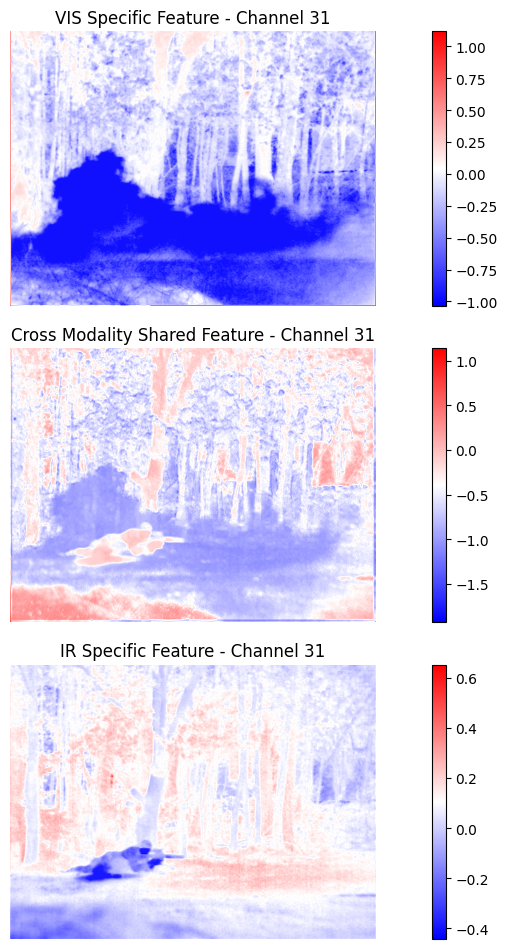

暂停30秒看看特征图


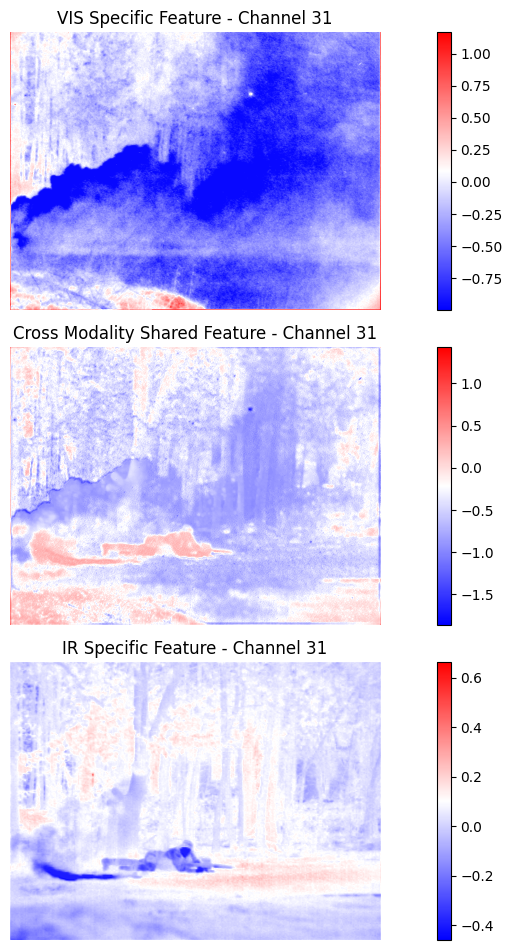

暂停30秒看看特征图


KeyboardInterrupt: 

In [ ]:
from net_best import Restormer_Encoder, Restormer_Decoder, BaseFeatureExtraction, DetailFeatureExtraction,\
                Restormer_resolve_Encoder, SpecificFeatureCross
                
import os
import time
import numpy as np
from utils.Evaluator import Evaluator
import torch
import torch.nn as nn
from utils.img_read_save import img_save,image_read_cv2
from utils.FeatureMap import plt_show_decomp_feature
import warnings
import logging
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.CRITICAL)

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
# ckpt_path=r"models/CDDFuse_IVF.pth"
ckpt_path= r"models/SepcificDecompFuse_OnePhase_01-14-11-02-grad100.pth"
for dataset_name in ["TNO","RoadScene","MSRS"]:
    # print("\n"*2+"="*80)
    # model_name="CDDFuse    "
    # print("The test result of "+dataset_name+' :')
    test_folder=os.path.join('test_img',dataset_name) 
    test_out_folder=os.path.join('test_result',dataset_name)
    feature_map_out_folfer_shared = os.path.join('test_feature_map_shd',dataset_name)
    feature_map_out_folfer_speir = os.path.join('test_feature_map_speir',dataset_name)
    feature_map_out_folfer_spevis = os.path.join('test_feature_map_spevis',dataset_name)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    Encoder = nn.DataParallel(Restormer_resolve_Encoder()).to(device)
    Decoder = nn.DataParallel(Restormer_Decoder()).to(device) 
    # SepcificFuseLayer = nn.DataParallel(SpecificFeatureCross()).to(device)
    SepcificFuseLayer = nn.DataParallel(DetailFeatureExtraction(num_layers=4)).to(device)

    Encoder.load_state_dict(torch.load(ckpt_path)['DIDF_Encoder'])
    Decoder.load_state_dict(torch.load(ckpt_path)['DIDF_Decoder'])
    SepcificFuseLayer.load_state_dict(torch.load(ckpt_path)['SepcificFuseLayer'])

    Encoder.eval()
    Decoder.eval()
    SepcificFuseLayer.eval()

    with torch.no_grad():
        for img_name in os.listdir(os.path.join(test_folder,"ir")):

            data_IR=image_read_cv2(os.path.join(test_folder,"ir",img_name),mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0
            data_VIS = image_read_cv2(os.path.join(test_folder,"vi",img_name), mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0

            data_IR,data_VIS = torch.FloatTensor(data_IR),torch.FloatTensor(data_VIS)
            data_VIS, data_IR = data_VIS.cuda(), data_IR.cuda()

            shared_feature, specific_feature_vis, specific_feature_ir = Encoder(data_VIS, data_IR)
            # specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            
            specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            data_Fuse, _ = Decoder(data_VIS, shared_feature, specific_feature_fuse)
            data_Fuse=(data_Fuse-torch.min(data_Fuse))/(torch.max(data_Fuse)-torch.min(data_Fuse))
            fi = np.squeeze((data_Fuse * 255).cpu().numpy())
            # 下面这一行是我加的
            fi = fi.astype(np.uint8)
            
            img_save(fi, img_name.split(sep='.')[0], test_out_folder)

            # Show Feature Maps
            plt_show_decomp_feature(specific_feature_vis, shared_feature, specific_feature_ir, channel_index=31, colarmap='bwr')
            

            print("暂停30秒看看特征图")
            time.sleep(30)
            


    # eval_folder=test_out_folder  
    # ori_img_folder=test_folder

    # metric_result = np.zeros((11))
    # for img_name in os.listdir(os.path.join(ori_img_folder,"ir")):
    #         ir = image_read_cv2(os.path.join(ori_img_folder,"ir", img_name), 'GRAY')
    #         vi = image_read_cv2(os.path.join(ori_img_folder,"vi", img_name), 'GRAY')
    #         fi = image_read_cv2(os.path.join(eval_folder, img_name.split('.')[0]+".png"), 'GRAY')
    #         metric_result += np.array([Evaluator.EN(fi), Evaluator.SD(fi)
    #                                     , Evaluator.SF(fi), Evaluator.MI(fi, ir, vi)
    #                                     , Evaluator.SCD(fi, ir, vi), Evaluator.VIFF(fi, ir, vi)
    #                                     , Evaluator.Qabf(fi, ir, vi), Evaluator.SSIM(fi, ir, vi)
    #                                     , Evaluator.AG(fi), Evaluator.CC(fi, ir, vi)
    #                                     , Evaluator.PSNR(fi, ir, vi)])

    # metric_result /= len(os.listdir(eval_folder))
    # print("\t\t EN\t SD\t SF\t MI\tSCD\tVIF\tQabf\tSSIM")
    # print(model_name+'\t'+str(np.round(metric_result[0], 2))+'\t'
    #         +str(np.round(metric_result[1], 2))+'\t'
    #         +str(np.round(metric_result[2], 2))+'\t'
    #         +str(np.round(metric_result[3], 2))+'\t'
    #         +str(np.round(metric_result[4], 2))+'\t'
    #         +str(np.round(metric_result[5], 2))+'\t'
    #         +str(np.round(metric_result[6], 2))+'\t'
    #         +str(np.round(metric_result[7], 2))+'\t'
    #         +str(np.round(metric_result[8], 2))+'\t'
    #         +str(np.round(metric_result[9], 2))+'\t'
    #         +str(np.round(metric_result[10], 2))
    #         )
    # print("="*80)

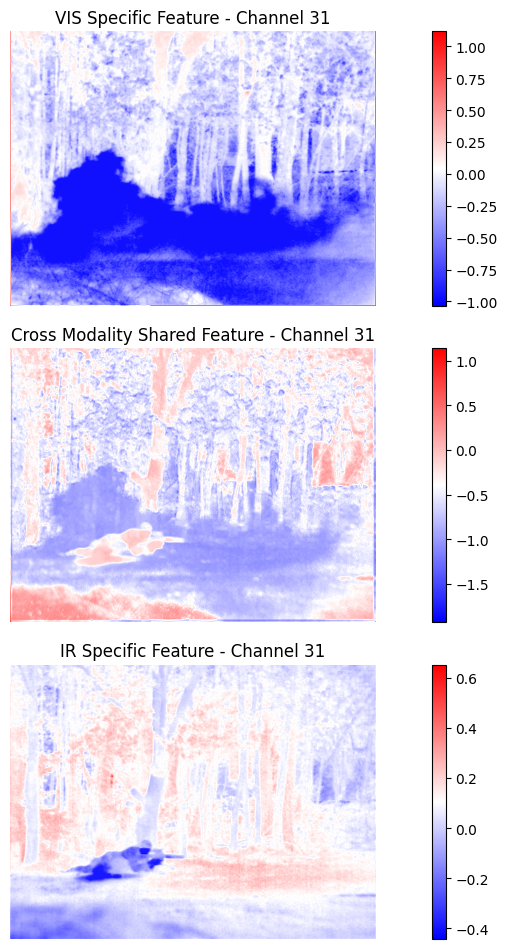

暂停30秒看看特征图


KeyboardInterrupt: 

In [ ]:
from net_best import Restormer_Encoder, Restormer_Decoder, BaseFeatureExtraction, DetailFeatureExtraction,\
                Restormer_resolve_Encoder, SpecificFeatureCross
                
import os
import time
import numpy as np
from utils.Evaluator import Evaluator
import torch
import torch.nn as nn
from utils.img_read_save import img_save,image_read_cv2
from utils.FeatureMap import plt_show_decomp_feature
import warnings
import logging
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.CRITICAL)

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
# ckpt_path=r"models/CDDFuse_IVF.pth"
ckpt_path= r"models/SepcificDecompFuse_OnePhase_01-14-11-02-grad100.pth"
for dataset_name in ["TNO","RoadScene","MSRS"]:
    # print("\n"*2+"="*80)
    # model_name="CDDFuse    "
    # print("The test result of "+dataset_name+' :')
    test_folder=os.path.join('test_img',dataset_name) 
    test_out_folder=os.path.join('test_result',dataset_name)
    feature_map_out_folfer_shared = os.path.join('test_feature_map_shd',dataset_name)
    feature_map_out_folfer_speir = os.path.join('test_feature_map_speir',dataset_name)
    feature_map_out_folfer_spevis = os.path.join('test_feature_map_spevis',dataset_name)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    Encoder = nn.DataParallel(Restormer_resolve_Encoder()).to(device)
    Decoder = nn.DataParallel(Restormer_Decoder()).to(device) 
    # SepcificFuseLayer = nn.DataParallel(SpecificFeatureCross()).to(device)
    SepcificFuseLayer = nn.DataParallel(DetailFeatureExtraction(num_layers=4)).to(device)

    Encoder.load_state_dict(torch.load(ckpt_path)['DIDF_Encoder'])
    Decoder.load_state_dict(torch.load(ckpt_path)['DIDF_Decoder'])
    SepcificFuseLayer.load_state_dict(torch.load(ckpt_path)['SepcificFuseLayer'])

    Encoder.eval()
    Decoder.eval()
    SepcificFuseLayer.eval()

    with torch.no_grad():
        for img_name in os.listdir(os.path.join(test_folder,"ir")):

            data_IR=image_read_cv2(os.path.join(test_folder,"ir",img_name),mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0
            data_VIS = image_read_cv2(os.path.join(test_folder,"vi",img_name), mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0

            data_IR,data_VIS = torch.FloatTensor(data_IR),torch.FloatTensor(data_VIS)
            data_VIS, data_IR = data_VIS.cuda(), data_IR.cuda()

            shared_feature, specific_feature_vis, specific_feature_ir = Encoder(data_VIS, data_IR)
            # specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            
            specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            data_Fuse, _ = Decoder(data_VIS, shared_feature, specific_feature_fuse)
            data_Fuse=(data_Fuse-torch.min(data_Fuse))/(torch.max(data_Fuse)-torch.min(data_Fuse))
            fi = np.squeeze((data_Fuse * 255).cpu().numpy())
            # (Added) 变成可以保存为图片的unit8类型
            fi = fi.astype(np.uint8)
            
            img_save(fi, img_name.split(sep='.')[0], test_out_folder)

            # Show Feature Maps
            plt_show_decomp_feature(specific_feature_vis, shared_feature, specific_feature_ir, channel_index=31, colarmap='bwr')
            

            print("暂停30秒看看特征图")
            time.sleep(30)
            


    # eval_folder=test_out_folder  
    # ori_img_folder=test_folder

    # metric_result = np.zeros((11))
    # for img_name in os.listdir(os.path.join(ori_img_folder,"ir")):
    #         ir = image_read_cv2(os.path.join(ori_img_folder,"ir", img_name), 'GRAY')
    #         vi = image_read_cv2(os.path.join(ori_img_folder,"vi", img_name), 'GRAY')
    #         fi = image_read_cv2(os.path.join(eval_folder, img_name.split('.')[0]+".png"), 'GRAY')
    #         metric_result += np.array([Evaluator.EN(fi), Evaluator.SD(fi)
    #                                     , Evaluator.SF(fi), Evaluator.MI(fi, ir, vi)
    #                                     , Evaluator.SCD(fi, ir, vi), Evaluator.VIFF(fi, ir, vi)
    #                                     , Evaluator.Qabf(fi, ir, vi), Evaluator.SSIM(fi, ir, vi)
    #                                     , Evaluator.AG(fi), Evaluator.CC(fi, ir, vi)
    #                                     , Evaluator.PSNR(fi, ir, vi)])

    # metric_result /= len(os.listdir(eval_folder))
    # print("\t\t EN\t SD\t SF\t MI\tSCD\tVIF\tQabf\tSSIM")
    # print(model_name+'\t'+str(np.round(metric_result[0], 2))+'\t'
    #         +str(np.round(metric_result[1], 2))+'\t'
    #         +str(np.round(metric_result[2], 2))+'\t'
    #         +str(np.round(metric_result[3], 2))+'\t'
    #         +str(np.round(metric_result[4], 2))+'\t'
    #         +str(np.round(metric_result[5], 2))+'\t'
    #         +str(np.round(metric_result[6], 2))+'\t'
    #         +str(np.round(metric_result[7], 2))+'\t'
    #         +str(np.round(metric_result[8], 2))+'\t'
    #         +str(np.round(metric_result[9], 2))+'\t'
    #         +str(np.round(metric_result[10], 2))
    #         )
    # print("="*80)

In [ ]:
from net_best import Restormer_Encoder, Restormer_Decoder, BaseFeatureExtraction, DetailFeatureExtraction,\
                Restormer_resolve_Encoder, SpecificFeatureCross
                
import os
import time
import numpy as np
from utils.Evaluator import Evaluator
import torch
import torch.nn as nn
from utils.img_read_save import img_save,image_read_cv2
from utils.FeatureMap import plt_show_decomp_feature, plt_show_distribution
import warnings
import logging
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.CRITICAL)

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
# ckpt_path=r"models/CDDFuse_IVF.pth"
ckpt_path= r"models/SepcificDecompFuse_OnePhase_01-14-11-02-grad100.pth"
for dataset_name in ["TNO","RoadScene","MSRS"]:
    # print("\n"*2+"="*80)
    # model_name="CDDFuse    "
    # print("The test result of "+dataset_name+' :')
    test_folder=os.path.join('test_img',dataset_name) 
    test_out_folder=os.path.join('test_result',dataset_name)
    feature_map_out_folfer_shared = os.path.join('test_feature_map_shd',dataset_name)
    feature_map_out_folfer_speir = os.path.join('test_feature_map_speir',dataset_name)
    feature_map_out_folfer_spevis = os.path.join('test_feature_map_spevis',dataset_name)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    Encoder = nn.DataParallel(Restormer_resolve_Encoder()).to(device)
    Decoder = nn.DataParallel(Restormer_Decoder()).to(device) 
    # SepcificFuseLayer = nn.DataParallel(SpecificFeatureCross()).to(device)
    SepcificFuseLayer = nn.DataParallel(DetailFeatureExtraction(num_layers=4)).to(device)

    Encoder.load_state_dict(torch.load(ckpt_path)['DIDF_Encoder'])
    Decoder.load_state_dict(torch.load(ckpt_path)['DIDF_Decoder'])
    SepcificFuseLayer.load_state_dict(torch.load(ckpt_path)['SepcificFuseLayer'])

    Encoder.eval()
    Decoder.eval()
    SepcificFuseLayer.eval()

    with torch.no_grad():
        for img_name in os.listdir(os.path.join(test_folder,"ir")):

            data_IR=image_read_cv2(os.path.join(test_folder,"ir",img_name),mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0
            data_VIS = image_read_cv2(os.path.join(test_folder,"vi",img_name), mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0

            data_IR,data_VIS = torch.FloatTensor(data_IR),torch.FloatTensor(data_VIS)
            data_VIS, data_IR = data_VIS.cuda(), data_IR.cuda()

            shared_feature, specific_feature_vis, specific_feature_ir = Encoder(data_VIS, data_IR)
            # specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            
            specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            data_Fuse, _ = Decoder(data_VIS, shared_feature, specific_feature_fuse)
            data_Fuse=(data_Fuse-torch.min(data_Fuse))/(torch.max(data_Fuse)-torch.min(data_Fuse))
            fi = np.squeeze((data_Fuse * 255).cpu().numpy())
            # (Added) 变成可以保存为图片的unit8类型
            fi = fi.astype(np.uint8)
            
            img_save(fi, img_name.split(sep='.')[0], test_out_folder)

            # Show Feature Maps
            plt_show_decomp_feature(specific_feature_vis, shared_feature, specific_feature_ir, channel_index=31, colarmap='bwr')
            plt_show_distribution(specific_feature_vis, channel_index=31)

            print("暂停30秒看看特征图")
            time.sleep(30)
            


    # eval_folder=test_out_folder  
    # ori_img_folder=test_folder

    # metric_result = np.zeros((11))
    # for img_name in os.listdir(os.path.join(ori_img_folder,"ir")):
    #         ir = image_read_cv2(os.path.join(ori_img_folder,"ir", img_name), 'GRAY')
    #         vi = image_read_cv2(os.path.join(ori_img_folder,"vi", img_name), 'GRAY')
    #         fi = image_read_cv2(os.path.join(eval_folder, img_name.split('.')[0]+".png"), 'GRAY')
    #         metric_result += np.array([Evaluator.EN(fi), Evaluator.SD(fi)
    #                                     , Evaluator.SF(fi), Evaluator.MI(fi, ir, vi)
    #                                     , Evaluator.SCD(fi, ir, vi), Evaluator.VIFF(fi, ir, vi)
    #                                     , Evaluator.Qabf(fi, ir, vi), Evaluator.SSIM(fi, ir, vi)
    #                                     , Evaluator.AG(fi), Evaluator.CC(fi, ir, vi)
    #                                     , Evaluator.PSNR(fi, ir, vi)])

    # metric_result /= len(os.listdir(eval_folder))
    # print("\t\t EN\t SD\t SF\t MI\tSCD\tVIF\tQabf\tSSIM")
    # print(model_name+'\t'+str(np.round(metric_result[0], 2))+'\t'
    #         +str(np.round(metric_result[1], 2))+'\t'
    #         +str(np.round(metric_result[2], 2))+'\t'
    #         +str(np.round(metric_result[3], 2))+'\t'
    #         +str(np.round(metric_result[4], 2))+'\t'
    #         +str(np.round(metric_result[5], 2))+'\t'
    #         +str(np.round(metric_result[6], 2))+'\t'
    #         +str(np.round(metric_result[7], 2))+'\t'
    #         +str(np.round(metric_result[8], 2))+'\t'
    #         +str(np.round(metric_result[9], 2))+'\t'
    #         +str(np.round(metric_result[10], 2))
    #         )
    # print("="*80)

ImportError: cannot import name 'plt_show_distribution' from 'utils.FeatureMap' (/home/kpn/wsq/bishe/utils/FeatureMap.py)

In [ ]:
from net_best import Restormer_Encoder, Restormer_Decoder, BaseFeatureExtraction, DetailFeatureExtraction,\
                Restormer_resolve_Encoder, SpecificFeatureCross
                
import os
import time
import numpy as np
from utils.Evaluator import Evaluator
import torch
import torch.nn as nn
from utils.img_read_save import img_save,image_read_cv2
from utils.FeatureMap import plt_show_decomp_feature, plt_show_distribution
import warnings
import logging
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.CRITICAL)

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
# ckpt_path=r"models/CDDFuse_IVF.pth"
ckpt_path= r"models/SepcificDecompFuse_OnePhase_01-14-11-02-grad100.pth"
for dataset_name in ["TNO","RoadScene","MSRS"]:
    # print("\n"*2+"="*80)
    # model_name="CDDFuse    "
    # print("The test result of "+dataset_name+' :')
    test_folder=os.path.join('test_img',dataset_name) 
    test_out_folder=os.path.join('test_result',dataset_name)
    feature_map_out_folfer_shared = os.path.join('test_feature_map_shd',dataset_name)
    feature_map_out_folfer_speir = os.path.join('test_feature_map_speir',dataset_name)
    feature_map_out_folfer_spevis = os.path.join('test_feature_map_spevis',dataset_name)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    Encoder = nn.DataParallel(Restormer_resolve_Encoder()).to(device)
    Decoder = nn.DataParallel(Restormer_Decoder()).to(device) 
    # SepcificFuseLayer = nn.DataParallel(SpecificFeatureCross()).to(device)
    SepcificFuseLayer = nn.DataParallel(DetailFeatureExtraction(num_layers=4)).to(device)

    Encoder.load_state_dict(torch.load(ckpt_path)['DIDF_Encoder'])
    Decoder.load_state_dict(torch.load(ckpt_path)['DIDF_Decoder'])
    SepcificFuseLayer.load_state_dict(torch.load(ckpt_path)['SepcificFuseLayer'])

    Encoder.eval()
    Decoder.eval()
    SepcificFuseLayer.eval()

    with torch.no_grad():
        for img_name in os.listdir(os.path.join(test_folder,"ir")):

            data_IR=image_read_cv2(os.path.join(test_folder,"ir",img_name),mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0
            data_VIS = image_read_cv2(os.path.join(test_folder,"vi",img_name), mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0

            data_IR,data_VIS = torch.FloatTensor(data_IR),torch.FloatTensor(data_VIS)
            data_VIS, data_IR = data_VIS.cuda(), data_IR.cuda()

            shared_feature, specific_feature_vis, specific_feature_ir = Encoder(data_VIS, data_IR)
            # specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            
            specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            data_Fuse, _ = Decoder(data_VIS, shared_feature, specific_feature_fuse)
            data_Fuse=(data_Fuse-torch.min(data_Fuse))/(torch.max(data_Fuse)-torch.min(data_Fuse))
            fi = np.squeeze((data_Fuse * 255).cpu().numpy())
            # (Added) 变成可以保存为图片的unit8类型
            fi = fi.astype(np.uint8)
            
            img_save(fi, img_name.split(sep='.')[0], test_out_folder)

            # Show Feature Maps
            plt_show_decomp_feature(specific_feature_vis, shared_feature, specific_feature_ir, channel_index=31, colarmap='bwr')
            plt_show_distribution(specific_feature_vis, channel_index=31)

            print("暂停30秒看看特征图")
            time.sleep(30)
            


    # eval_folder=test_out_folder  
    # ori_img_folder=test_folder

    # metric_result = np.zeros((11))
    # for img_name in os.listdir(os.path.join(ori_img_folder,"ir")):
    #         ir = image_read_cv2(os.path.join(ori_img_folder,"ir", img_name), 'GRAY')
    #         vi = image_read_cv2(os.path.join(ori_img_folder,"vi", img_name), 'GRAY')
    #         fi = image_read_cv2(os.path.join(eval_folder, img_name.split('.')[0]+".png"), 'GRAY')
    #         metric_result += np.array([Evaluator.EN(fi), Evaluator.SD(fi)
    #                                     , Evaluator.SF(fi), Evaluator.MI(fi, ir, vi)
    #                                     , Evaluator.SCD(fi, ir, vi), Evaluator.VIFF(fi, ir, vi)
    #                                     , Evaluator.Qabf(fi, ir, vi), Evaluator.SSIM(fi, ir, vi)
    #                                     , Evaluator.AG(fi), Evaluator.CC(fi, ir, vi)
    #                                     , Evaluator.PSNR(fi, ir, vi)])

    # metric_result /= len(os.listdir(eval_folder))
    # print("\t\t EN\t SD\t SF\t MI\tSCD\tVIF\tQabf\tSSIM")
    # print(model_name+'\t'+str(np.round(metric_result[0], 2))+'\t'
    #         +str(np.round(metric_result[1], 2))+'\t'
    #         +str(np.round(metric_result[2], 2))+'\t'
    #         +str(np.round(metric_result[3], 2))+'\t'
    #         +str(np.round(metric_result[4], 2))+'\t'
    #         +str(np.round(metric_result[5], 2))+'\t'
    #         +str(np.round(metric_result[6], 2))+'\t'
    #         +str(np.round(metric_result[7], 2))+'\t'
    #         +str(np.round(metric_result[8], 2))+'\t'
    #         +str(np.round(metric_result[9], 2))+'\t'
    #         +str(np.round(metric_result[10], 2))
    #         )
    # print("="*80)

ImportError: cannot import name 'plt_show_distribution' from 'utils.FeatureMap' (/home/kpn/wsq/bishe/utils/FeatureMap.py)

In [ ]:
from net_best import Restormer_Encoder, Restormer_Decoder, BaseFeatureExtraction, DetailFeatureExtraction,\
                Restormer_resolve_Encoder, SpecificFeatureCross
                
import os
import time
import numpy as np
from utils.Evaluator import Evaluator
import torch
import torch.nn as nn
from utils.img_read_save import img_save,image_read_cv2
from utils.FeatureMap import plt_show_decomp_feature, plt_show_distribution
import warnings
import logging
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.CRITICAL)

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
# ckpt_path=r"models/CDDFuse_IVF.pth"
ckpt_path= r"models/SepcificDecompFuse_OnePhase_01-14-11-02-grad100.pth"
for dataset_name in ["TNO","RoadScene","MSRS"]:
    # print("\n"*2+"="*80)
    # model_name="CDDFuse    "
    # print("The test result of "+dataset_name+' :')
    test_folder=os.path.join('test_img',dataset_name) 
    test_out_folder=os.path.join('test_result',dataset_name)
    feature_map_out_folfer_shared = os.path.join('test_feature_map_shd',dataset_name)
    feature_map_out_folfer_speir = os.path.join('test_feature_map_speir',dataset_name)
    feature_map_out_folfer_spevis = os.path.join('test_feature_map_spevis',dataset_name)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    Encoder = nn.DataParallel(Restormer_resolve_Encoder()).to(device)
    Decoder = nn.DataParallel(Restormer_Decoder()).to(device) 
    # SepcificFuseLayer = nn.DataParallel(SpecificFeatureCross()).to(device)
    SepcificFuseLayer = nn.DataParallel(DetailFeatureExtraction(num_layers=4)).to(device)

    Encoder.load_state_dict(torch.load(ckpt_path)['DIDF_Encoder'])
    Decoder.load_state_dict(torch.load(ckpt_path)['DIDF_Decoder'])
    SepcificFuseLayer.load_state_dict(torch.load(ckpt_path)['SepcificFuseLayer'])

    Encoder.eval()
    Decoder.eval()
    SepcificFuseLayer.eval()

    with torch.no_grad():
        for img_name in os.listdir(os.path.join(test_folder,"ir")):

            data_IR=image_read_cv2(os.path.join(test_folder,"ir",img_name),mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0
            data_VIS = image_read_cv2(os.path.join(test_folder,"vi",img_name), mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0

            data_IR,data_VIS = torch.FloatTensor(data_IR),torch.FloatTensor(data_VIS)
            data_VIS, data_IR = data_VIS.cuda(), data_IR.cuda()

            shared_feature, specific_feature_vis, specific_feature_ir = Encoder(data_VIS, data_IR)
            # specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            
            specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            data_Fuse, _ = Decoder(data_VIS, shared_feature, specific_feature_fuse)
            data_Fuse=(data_Fuse-torch.min(data_Fuse))/(torch.max(data_Fuse)-torch.min(data_Fuse))
            fi = np.squeeze((data_Fuse * 255).cpu().numpy())
            # (Added) 变成可以保存为图片的unit8类型
            fi = fi.astype(np.uint8)
            
            img_save(fi, img_name.split(sep='.')[0], test_out_folder)

            # Show Feature Maps
            plt_show_decomp_feature(specific_feature_vis, shared_feature, specific_feature_ir, channel_index=31, colarmap='bwr')
            plt_show_distribution(specific_feature_vis, channel_index=31)

            print("暂停30秒看看特征图")
            time.sleep(30)
            


    # eval_folder=test_out_folder  
    # ori_img_folder=test_folder

    # metric_result = np.zeros((11))
    # for img_name in os.listdir(os.path.join(ori_img_folder,"ir")):
    #         ir = image_read_cv2(os.path.join(ori_img_folder,"ir", img_name), 'GRAY')
    #         vi = image_read_cv2(os.path.join(ori_img_folder,"vi", img_name), 'GRAY')
    #         fi = image_read_cv2(os.path.join(eval_folder, img_name.split('.')[0]+".png"), 'GRAY')
    #         metric_result += np.array([Evaluator.EN(fi), Evaluator.SD(fi)
    #                                     , Evaluator.SF(fi), Evaluator.MI(fi, ir, vi)
    #                                     , Evaluator.SCD(fi, ir, vi), Evaluator.VIFF(fi, ir, vi)
    #                                     , Evaluator.Qabf(fi, ir, vi), Evaluator.SSIM(fi, ir, vi)
    #                                     , Evaluator.AG(fi), Evaluator.CC(fi, ir, vi)
    #                                     , Evaluator.PSNR(fi, ir, vi)])

    # metric_result /= len(os.listdir(eval_folder))
    # print("\t\t EN\t SD\t SF\t MI\tSCD\tVIF\tQabf\tSSIM")
    # print(model_name+'\t'+str(np.round(metric_result[0], 2))+'\t'
    #         +str(np.round(metric_result[1], 2))+'\t'
    #         +str(np.round(metric_result[2], 2))+'\t'
    #         +str(np.round(metric_result[3], 2))+'\t'
    #         +str(np.round(metric_result[4], 2))+'\t'
    #         +str(np.round(metric_result[5], 2))+'\t'
    #         +str(np.round(metric_result[6], 2))+'\t'
    #         +str(np.round(metric_result[7], 2))+'\t'
    #         +str(np.round(metric_result[8], 2))+'\t'
    #         +str(np.round(metric_result[9], 2))+'\t'
    #         +str(np.round(metric_result[10], 2))
    #         )
    # print("="*80)

ImportError: cannot import name 'plt_show_distribution' from 'utils.FeatureMap' (/home/kpn/wsq/bishe/utils/FeatureMap.py)

In [ ]:
from net_best import Restormer_Encoder, Restormer_Decoder, BaseFeatureExtraction, DetailFeatureExtraction,\
                Restormer_resolve_Encoder, SpecificFeatureCross
                
import os
import time
import numpy as np
from utils.Evaluator import Evaluator
import torch
import torch.nn as nn
from utils.img_read_save import img_save,image_read_cv2
from utils.FeatureMap import plt_show_decomp_feature, plt_show_fuse_feature, plt_show_distribution
import warnings
import logging
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.CRITICAL)

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
# ckpt_path=r"models/CDDFuse_IVF.pth"
ckpt_path= r"models/SepcificDecompFuse_OnePhase_01-14-11-02-grad100.pth"
for dataset_name in ["TNO","RoadScene","MSRS"]:
    # print("\n"*2+"="*80)
    # model_name="CDDFuse    "
    # print("The test result of "+dataset_name+' :')
    test_folder=os.path.join('test_img',dataset_name) 
    test_out_folder=os.path.join('test_result',dataset_name)
    feature_map_out_folfer_shared = os.path.join('test_feature_map_shd',dataset_name)
    feature_map_out_folfer_speir = os.path.join('test_feature_map_speir',dataset_name)
    feature_map_out_folfer_spevis = os.path.join('test_feature_map_spevis',dataset_name)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    Encoder = nn.DataParallel(Restormer_resolve_Encoder()).to(device)
    Decoder = nn.DataParallel(Restormer_Decoder()).to(device) 
    # SepcificFuseLayer = nn.DataParallel(SpecificFeatureCross()).to(device)
    SepcificFuseLayer = nn.DataParallel(DetailFeatureExtraction(num_layers=4)).to(device)

    Encoder.load_state_dict(torch.load(ckpt_path)['DIDF_Encoder'])
    Decoder.load_state_dict(torch.load(ckpt_path)['DIDF_Decoder'])
    SepcificFuseLayer.load_state_dict(torch.load(ckpt_path)['SepcificFuseLayer'])

    Encoder.eval()
    Decoder.eval()
    SepcificFuseLayer.eval()

    with torch.no_grad():
        for img_name in os.listdir(os.path.join(test_folder,"ir")):

            data_IR=image_read_cv2(os.path.join(test_folder,"ir",img_name),mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0
            data_VIS = image_read_cv2(os.path.join(test_folder,"vi",img_name), mode='GRAY')[np.newaxis,np.newaxis, ...]/255.0

            data_IR,data_VIS = torch.FloatTensor(data_IR),torch.FloatTensor(data_VIS)
            data_VIS, data_IR = data_VIS.cuda(), data_IR.cuda()

            shared_feature, specific_feature_vis, specific_feature_ir = Encoder(data_VIS, data_IR)
            # specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            
            specific_feature_fuse = SepcificFuseLayer(specific_feature_vis + specific_feature_ir)
            data_Fuse, _ = Decoder(data_VIS, shared_feature, specific_feature_fuse)
            data_Fuse=(data_Fuse-torch.min(data_Fuse))/(torch.max(data_Fuse)-torch.min(data_Fuse))
            fi = np.squeeze((data_Fuse * 255).cpu().numpy())
            # (Added) 变成可以保存为图片的unit8类型
            fi = fi.astype(np.uint8)
            
            img_save(fi, img_name.split(sep='.')[0], test_out_folder)

            # Show Feature Maps
            plt_show_decomp_feature(specific_feature_vis, shared_feature, specific_feature_ir, channel_index=31, colarmap='bwr')
            plt_show_distribution(specific_feature_vis, channel_index=31)

            print("暂停30秒看看特征图")
            time.sleep(30)
            


    # eval_folder=test_out_folder  
    # ori_img_folder=test_folder

    # metric_result = np.zeros((11))
    # for img_name in os.listdir(os.path.join(ori_img_folder,"ir")):
    #         ir = image_read_cv2(os.path.join(ori_img_folder,"ir", img_name), 'GRAY')
    #         vi = image_read_cv2(os.path.join(ori_img_folder,"vi", img_name), 'GRAY')
    #         fi = image_read_cv2(os.path.join(eval_folder, img_name.split('.')[0]+".png"), 'GRAY')
    #         metric_result += np.array([Evaluator.EN(fi), Evaluator.SD(fi)
    #                                     , Evaluator.SF(fi), Evaluator.MI(fi, ir, vi)
    #                                     , Evaluator.SCD(fi, ir, vi), Evaluator.VIFF(fi, ir, vi)
    #                                     , Evaluator.Qabf(fi, ir, vi), Evaluator.SSIM(fi, ir, vi)
    #                                     , Evaluator.AG(fi), Evaluator.CC(fi, ir, vi)
    #                                     , Evaluator.PSNR(fi, ir, vi)])

    # metric_result /= len(os.listdir(eval_folder))
    # print("\t\t EN\t SD\t SF\t MI\tSCD\tVIF\tQabf\tSSIM")
    # print(model_name+'\t'+str(np.round(metric_result[0], 2))+'\t'
    #         +str(np.round(metric_result[1], 2))+'\t'
    #         +str(np.round(metric_result[2], 2))+'\t'
    #         +str(np.round(metric_result[3], 2))+'\t'
    #         +str(np.round(metric_result[4], 2))+'\t'
    #         +str(np.round(metric_result[5], 2))+'\t'
    #         +str(np.round(metric_result[6], 2))+'\t'
    #         +str(np.round(metric_result[7], 2))+'\t'
    #         +str(np.round(metric_result[8], 2))+'\t'
    #         +str(np.round(metric_result[9], 2))+'\t'
    #         +str(np.round(metric_result[10], 2))
    #         )
    # print("="*80)

ImportError: cannot import name 'plt_show_distribution' from 'utils.FeatureMap' (/home/kpn/wsq/bishe/utils/FeatureMap.py)